#  Petrol Price Prediction

In [102]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100) 
OilPrice = pd.read_csv(r'D:\PG\PG Final\daily2.csv' )
OilPrice.head()

,Date,Price,Currency,Distributor,Country
0,01-01-1987,18.63,Rupees,Indian Oil,India
1,02-01-1987,18.45,Rupees,Indian Oil,India
2,03-01-1987,18.55,Rupees,Indian Oil,India
3,04-01-1987,18.60,Rupees,Indian Oil,India
4,05-01-1987,18.63,Rupees,Indian Oil,India


In [103]:
#define datatype

OilPrice['Date'].dtypes

dtype('O')

In [104]:
#convert Date column into Date format

OilPrice['Date'] = pd.to_datetime(OilPrice['Date'])

In [105]:
#set a index in Date Column

OilPrice.set_index('Date',inplace=True)



In [106]:
#print first 10 data 

OilPrice.head(10)

,Price,Currency,Distributor,Country
Date,,,,
1987-01-01,18.63,Rupees,Indian Oil,India
1987-02-01,18.45,Rupees,Indian Oil,India
1987-03-01,18.55,Rupees,Indian Oil,India
1987-04-01,18.60,Rupees,Indian Oil,India
1987-05-01,18.63,Rupees,Indian Oil,India
1987-06-01,18.60,Rupees,Indian Oil,India
1987-07-01,18.60,Rupees,Indian Oil,India
1987-08-01,18.58,Rupees,Indian Oil,India
1987-09-01,18.65,Rupees,Indian Oil,India


In [107]:
#print last 10 data

OilPrice.tail(10)

,Price,Currency,Distributor,Country
Date,,,,
2008-12-22,55.64,Rupees,Indian Oil,India
2008-12-23,57.10,Rupees,Indian Oil,India
2008-12-24,56.91,Rupees,Indian Oil,India
2008-12-25,59.46,Rupees,Indian Oil,India
2008-12-26,60.47,Rupees,Indian Oil,India
2008-12-27,59.24,Rupees,Indian Oil,India
2008-12-28,58.80,Rupees,Indian Oil,India
2008-12-29,58.65,Rupees,Indian Oil,India
2008-12-30,59.81,Rupees,Indian Oil,India


In [108]:
#describe the data's range, mean and frequency 

OilPrice.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,8036.0,NaN,NaN,NaN,45.912027,32.939735,9.1,18.65,30.205,67.28,143.95
Currency,8036,1,Rupees,8036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distributor,8036,1,Indian Oil,8036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,8036,1,India,8036,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
#check the null value in the dataset

OilPrice.isnull().sum()

Price          0
Currency       0
Distributor    0
Country        0
dtype: int64

In [110]:
#describe the column

OilPrice.columns

Index(['Price', 'Currency', 'Distributor', 'Country'], dtype='object')

In [111]:
#describe the datatype of Price column

OilPrice['Price'].dtypes

dtype('float64')

In [112]:
OilPrice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8036 entries, 1987-01-01 to 2008-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        8036 non-null   float64
 1   Currency     8036 non-null   object 
 2   Distributor  8036 non-null   object 
 3   Country      8036 non-null   object 
dtypes: float64(1), object(3)
memory usage: 313.9+ KB


# Visualisation

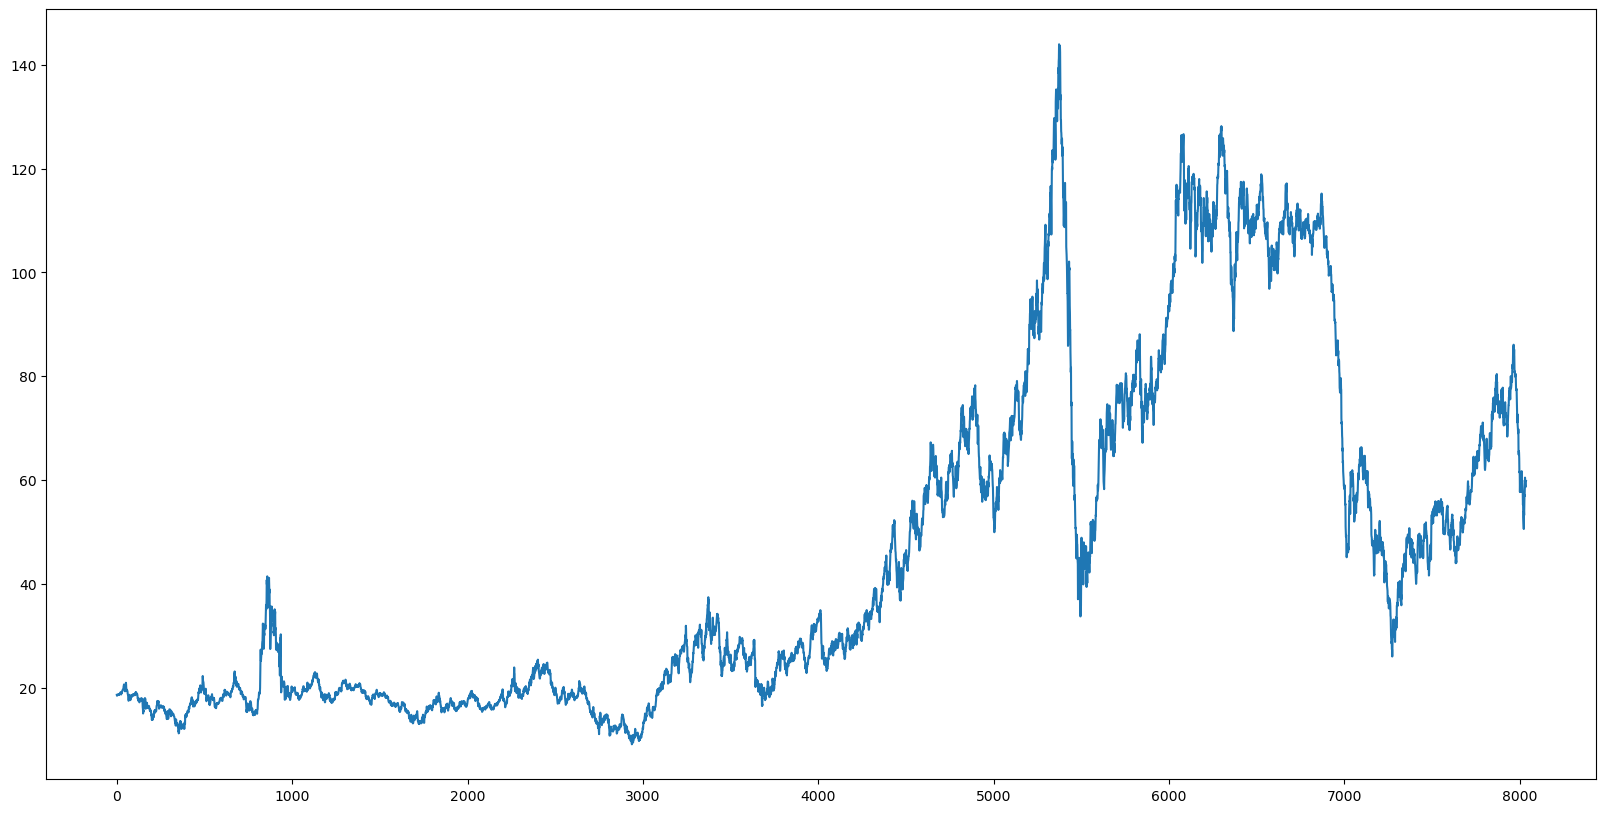

In [168]:
#setting index as date


# Plotting the Oil Price History
plt.figure(figsize=(20,10))
plt.plot(OilPrice['Price'], label='Petrol Price history')

In [115]:
# Convert the Date Index to a DateTimeIndex

def convert_index_to_datetimeindex(df):
    """ This is a utility function that is used to convert the index to a DateTimeIndex.
        Though the original DataFrame was imported by setting the index to the "Date" column
        this column is still in the "object" type which means it is a string. Converting the index to
        dtype = datetime64[ns] means that parts of the date can be easily extracted - like the day, month,
        and year, time deltas can be calculated and plots can be filled in with missing dates.
        Note: datetime64[ns] means a granularity of up to nanoseconds.        
    """
# converting the dates to DateTimeIndex
OilPrice.index = pd.to_datetime(OilPrice.index)
convert_index_to_datetimeindex(OilPrice)

In [116]:
#describe the dataset

OilPrice['Price'].fillna(OilPrice.mean(),inplace=True)
OilPrice

,Price,Currency,Distributor,Country
Date,,,,
1987-01-01,18.63,Rupees,Indian Oil,India
1987-02-01,18.45,Rupees,Indian Oil,India
1987-03-01,18.55,Rupees,Indian Oil,India
1987-04-01,18.60,Rupees,Indian Oil,India
1987-05-01,18.63,Rupees,Indian Oil,India
...,...,...,...,...
2008-12-27,59.24,Rupees,Indian Oil,India
2008-12-28,58.80,Rupees,Indian Oil,India
2008-12-29,58.65,Rupees,Indian Oil,India


In [117]:
from datetime import timedelta, datetime, date


def convert_date_to_time_elapsed(df):
    dates = pd.to_datetime(df.index, format='%d-%m-%Y')
    
    elapsed = dates - dates[0]
    df['Days Elapsed'] = elapsed.days
convert_date_to_time_elapsed(OilPrice)

# Scatter Chart

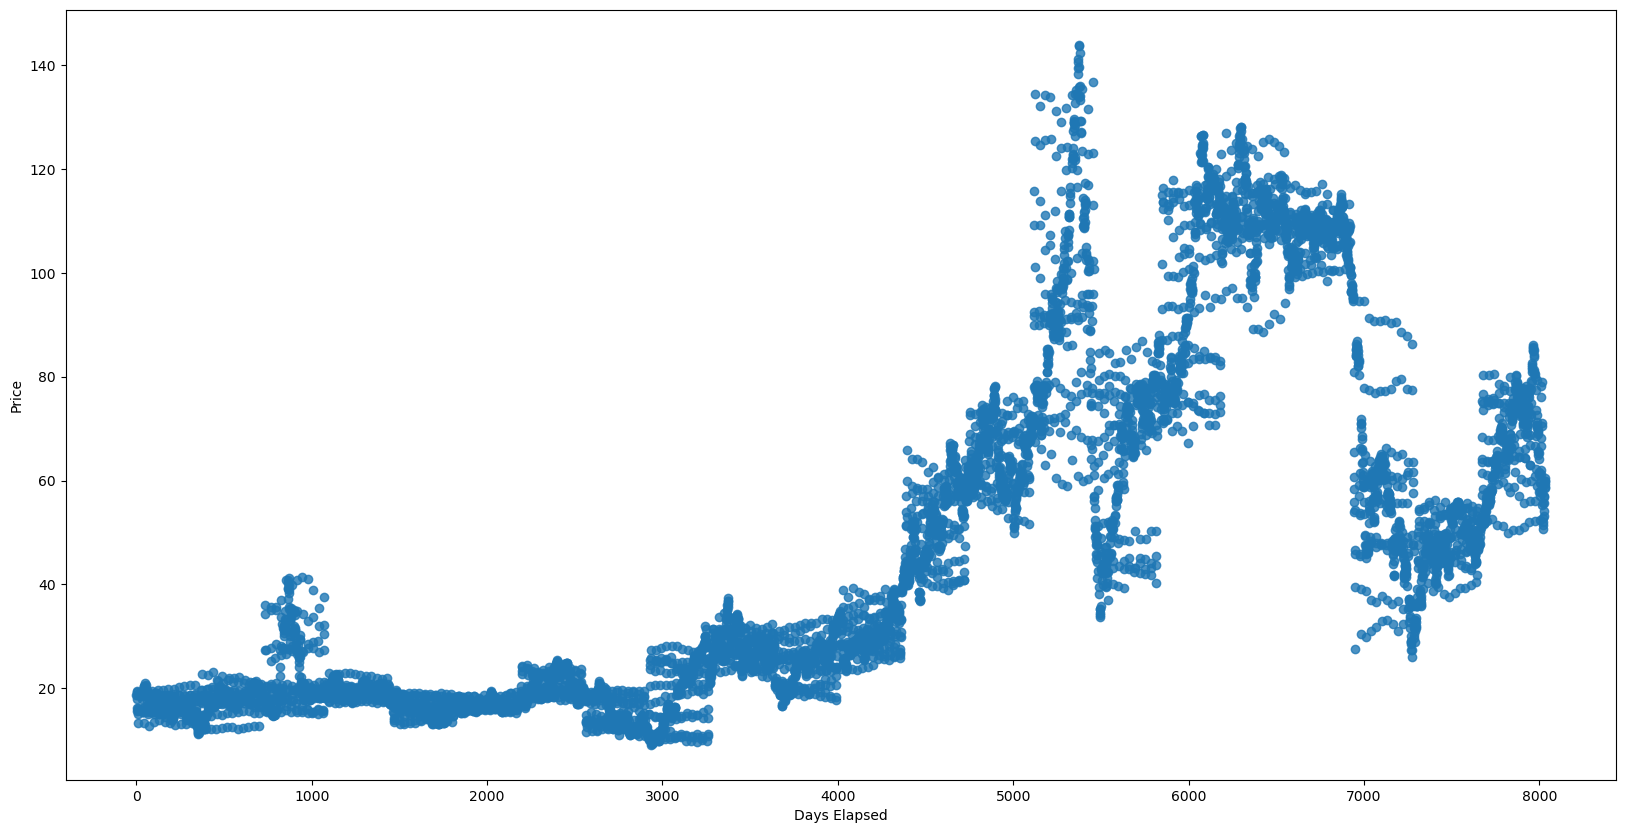

In [118]:
import seaborn as sns
sns.regplot(x='Days Elapsed', y='Price', data=OilPrice, fit_reg=False)
plt.show()

# Linear Regression Model

In [119]:
# Split the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = OilPrice['Days Elapsed']
X = X.values.reshape(-1,1)
y = OilPrice['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_test_pred = linreg.predict(X_test)
y_train_pred = linreg.predict(X_train)

In [120]:
#linear regression score

linreg.score(X_train, y_train)

0.5607958070376932

In [121]:
x=[]

In [122]:
print ('Co-efficient',linreg.coef_)
print ('Intercept',linreg.intercept_)

Co-efficient [0.01058364]
Intercept 3.2496834322413193


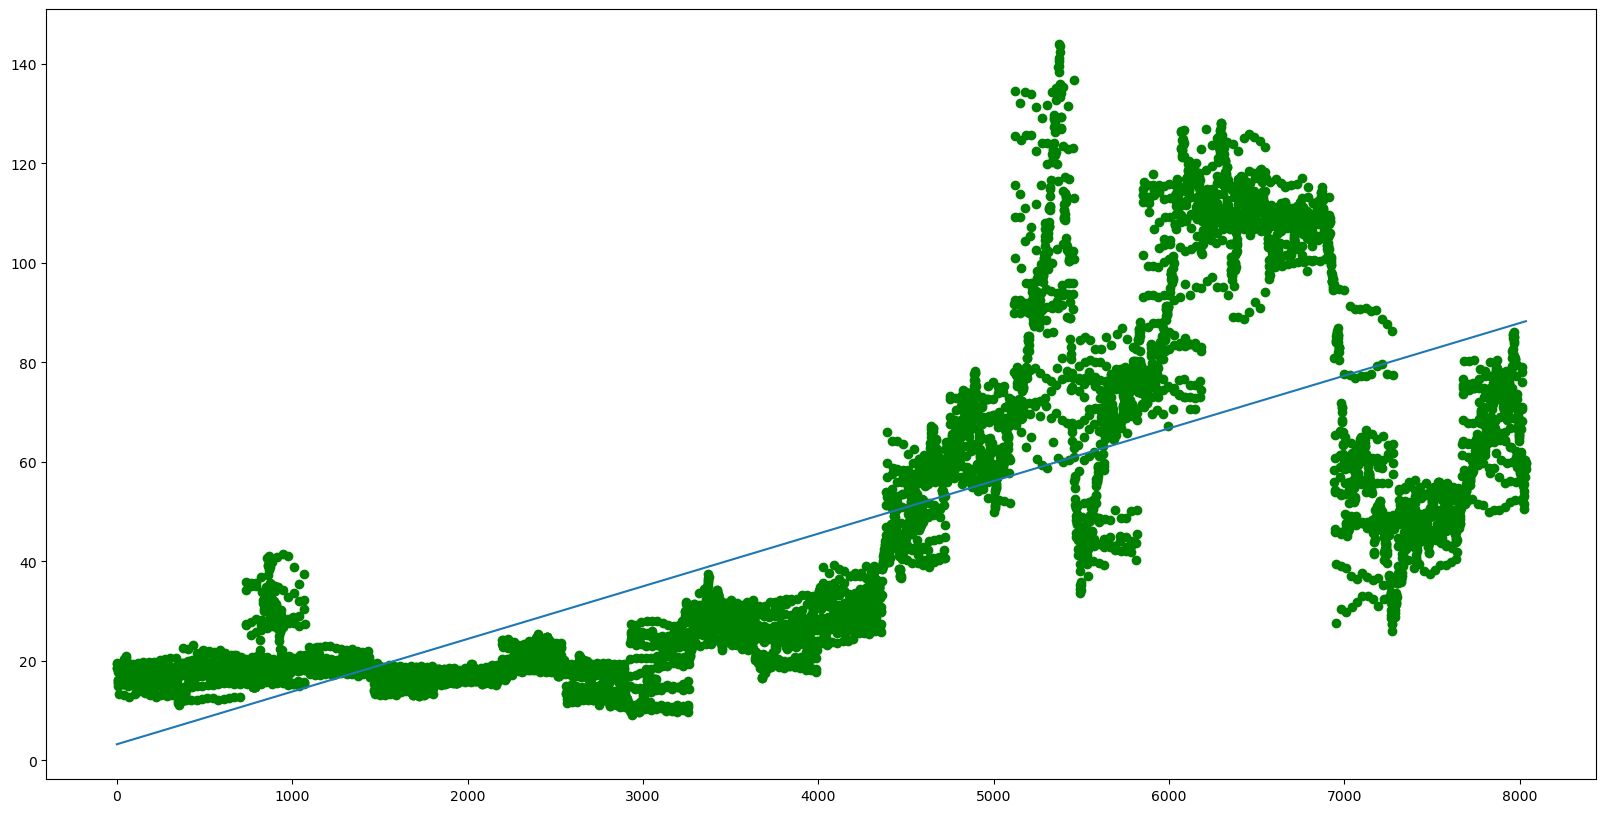

In [123]:
# Plot the Regression Line based on the Best fit line
reg_line=[(linreg.coef_*x)+linreg.intercept_ for x in OilPrice['Days Elapsed']]
plt.scatter(OilPrice['Days Elapsed'],OilPrice['Price'],color="green")
plt.plot(OilPrice['Days Elapsed'],reg_line)
plt.show()

In [124]:
# Manually Evaluate the Model 
56.07958070376932 + 0.01058364

56.09016434376932

In [125]:
# Evaluate the Predicting vs Actual
Predicting : 56.09 # From the above model
Actual     : 59.81 # Actual Data

In [126]:
# Evaluate the Model performance using Root Mean Squared Error (RMSE)
# RMSE is the square root of the mean of the squared errors

print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error : 22.169164752619537


In [127]:
from sklearn.metrics import r2_score
print("r2 error", r2_score(y_test, y_test_pred))

r2 error 0.5596709417520329


In [128]:
# Evaluate the Model performance with Mean Absolute Error (MAE) 
# MAE is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error: 17.47575366080942


In [129]:
# Evaluate the Model performance with Mean Squared Error (MSE)
# MSE is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))

Mean Squared Error: 491.4718658287884


In [130]:
print("EVALUATION OF THE MODEL")
print("______________________________________________")
print("")
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("______________________________________________")
print("")
print("r2 error:", r2_score(y_test, y_test_pred))
print("______________________________________________")
print("")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print("______________________________________________")
print("")
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print("______________________________________________")
print("")

EVALUATION OF THE MODEL
______________________________________________

Root Mean Squared Error : 22.169164752619537
______________________________________________

r2 error: 0.5596709417520329
______________________________________________

Mean Absolute Error: 17.47575366080942
______________________________________________

Mean Squared Error: 491.4718658287884
______________________________________________



# ---------------------------------------------------------------------------------------------------

# DECISION TREE

In [131]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [132]:
# Creating data frame and ingesting the data from .csv file into the data frame
OilPrice = pd.read_csv(r'D:\PG\PG Final\daily2.csv' )

In [133]:
OilPrice.head()

,Date,Price,Currency,Distributor,Country
0,01-01-1987,18.63,Rupees,Indian Oil,India
1,02-01-1987,18.45,Rupees,Indian Oil,India
2,03-01-1987,18.55,Rupees,Indian Oil,India
3,04-01-1987,18.60,Rupees,Indian Oil,India
4,05-01-1987,18.63,Rupees,Indian Oil,India


In [134]:
OilPrice.shape


(8036, 5)

In [136]:
import plotly.express as px

# Create a scatter plot
fig = px.line(OilPrice, x="Date", y="Price")
fig.show()

In [137]:
OilPrice['Date'] = pd.to_datetime(OilPrice['Date'], format='%d-%m-%Y')


In [138]:
#Split the data into training and testing sets
X = OilPrice['Date'].values.reshape(-1, 1) #.drop('Date', axis=1)
y = OilPrice['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a decision tree regressor to the training data
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [139]:
# Make predictions on the train data

y_pred1 = dt.predict(X_train)
print(y_pred1)


[107.8   19.47  45.66 ...  15.28  18.83  14.02]


In [140]:
# Make predictions on the test data

y_pred = dt.predict(X_test)
print(y_pred)

[114.67  15.18  48.24 ...  18.75  12.87  67.12]


In [141]:
# Evaluate the model on the testing data
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 1.3975899253731343


In [142]:
print(X_test)

[['2003-09-27T00:00:00.000000000']
 ['1995-05-09T00:00:00.000000000']
 ['2007-05-27T00:00:00.000000000']
 ...
 ['1987-01-10T00:00:00.000000000']
 ['1994-11-30T00:00:00.000000000']
 ['2002-07-29T00:00:00.000000000']]


In [143]:
print(y_test)

6113    120.35
3050     15.04
7451     48.43
188      15.68
1856     15.78
         ...  
6828    108.54
4864     71.26
9        18.68
2890     13.98
5688     66.50
Name: Price, Length: 1608, dtype: float64


In [144]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
# calculate accuracy

print("R-squared score:", r2_score(y_train, y_pred1))
print("Mean squared error:", mean_squared_error(y_train, y_pred1))

R-squared score: 1.0
Mean squared error: 0.0


In [145]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
# calculate accuracy

print("R-squared score:", r2_score(y_test, y_pred))
print("Mean squared error:", mean_squared_error(y_test, y_pred))

R-squared score: 0.9987470995487874
Mean squared error: 1.3975899253731343


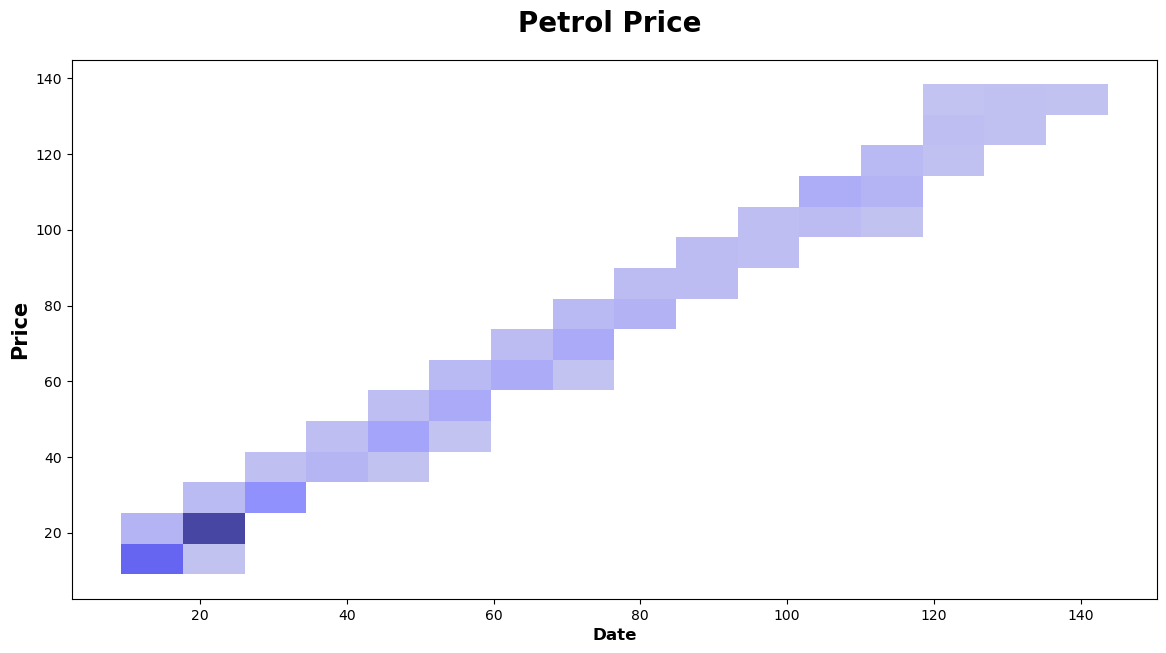

In [146]:
#visualizing the data before fit the model
plt.subplots(figsize=(14,7))
sns.histplot(x=y_test,y=y_pred, color='blue', kde=True)
plt.title("Petrol Price ", weight="bold",fontsize=20, pad=20)
plt.ylabel("Price", weight="bold", fontsize=15)
plt.xlabel("Date", weight="bold", fontsize=12)
plt.show()

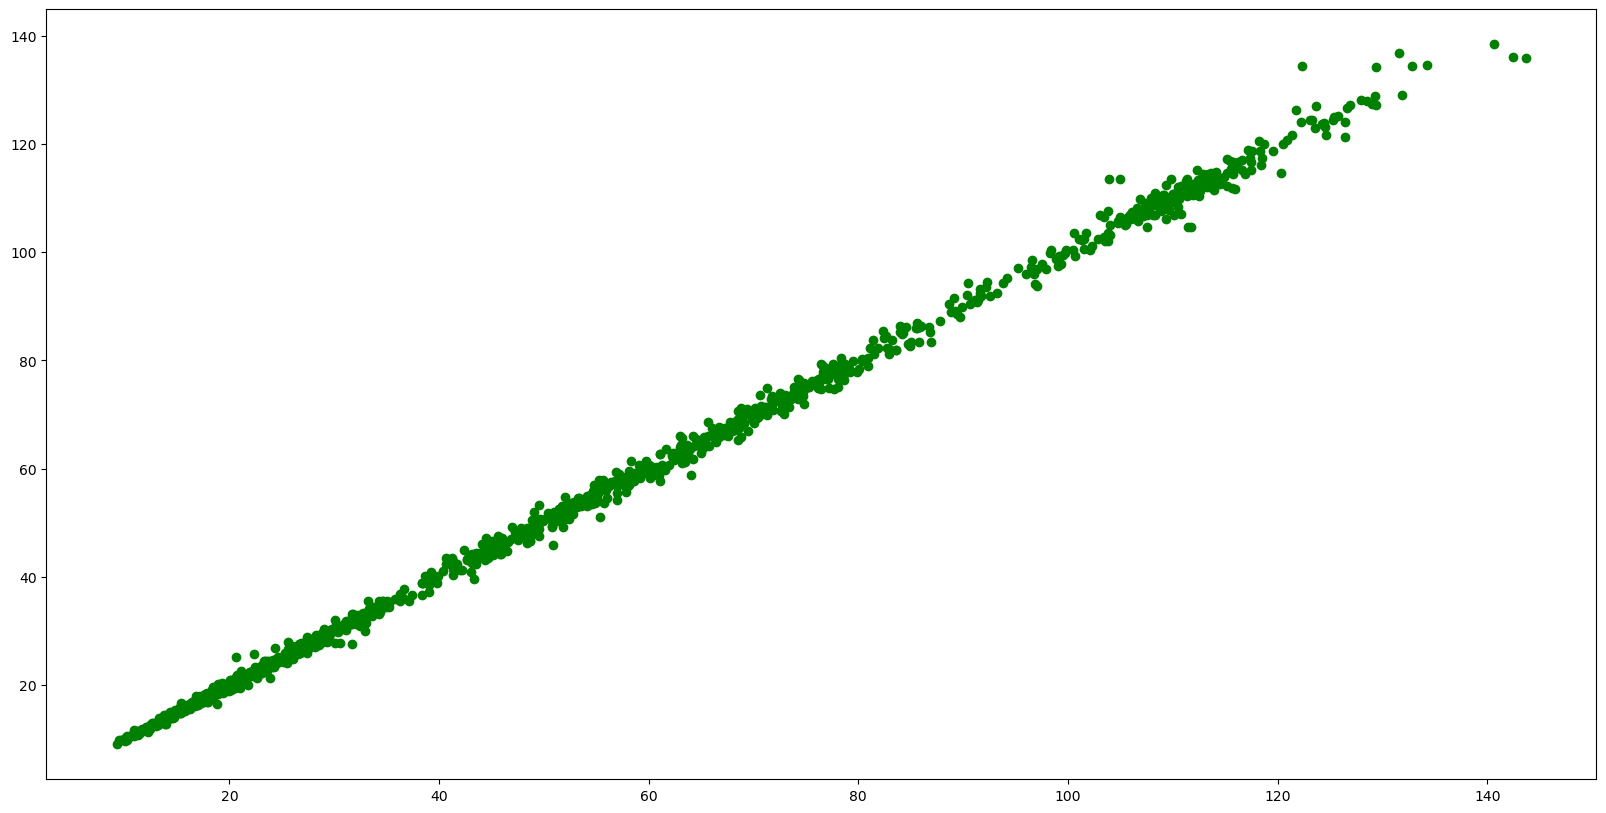

In [147]:
#visualizing data after the fitting of the model
plt.grid
plt.scatter(y_test,y_pred, color='g')


# --------------------------------------------------------------------------------------------------

# Heat Map

In [166]:
import seaborn as sns

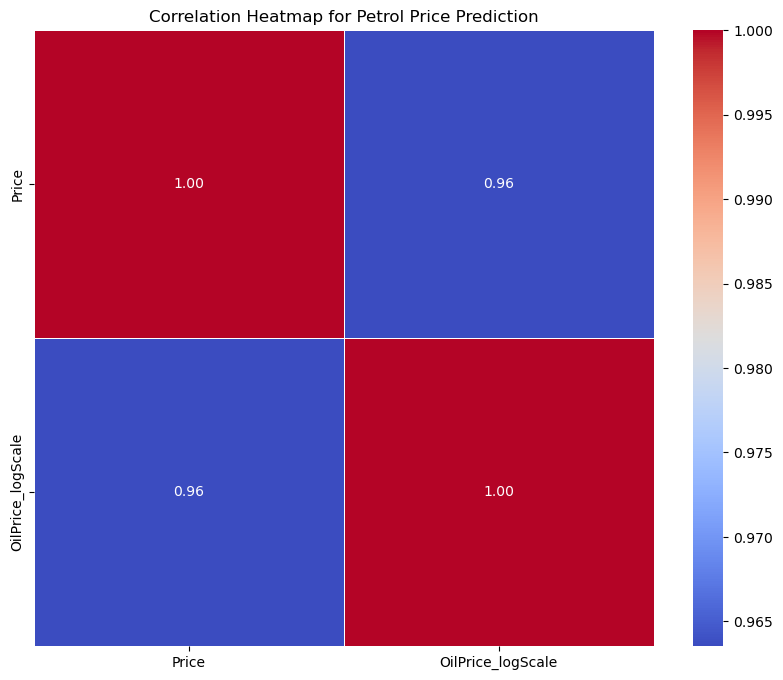

In [167]:
# Calculate correlation matrix
correlation_matrix = OilPrice.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Petrol Price Prediction')
plt.show()

# -----------------------------------------------------------------------------------------------------------------

# Time Series Model

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [152]:
print(f"Date range of Petrol price available from- {OilPrice.loc[:,'Date'][0]} to {OilPrice.loc[:,'Date'][len(OilPrice)-1]}")

Date range of Petrol price available from- 1987-01-01 00:00:00 to 2008-12-31 00:00:00


In [153]:
date= pd.date_range (start ='01-06-1987', end= '29-04-2019', freq= 'D')
date

DatetimeIndex(['1987-01-06', '1987-01-07', '1987-01-08', '1987-01-09',
               '1987-01-10', '1987-01-11', '1987-01-12', '1987-01-13',
               '1987-01-14', '1987-01-15',
               ...
               '2019-04-20', '2019-04-21', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-27',
               '2019-04-28', '2019-04-29'],
              dtype='datetime64[ns]', length=11802, freq='D')

In [154]:
# Split the data into training and testing sets
train_data = OilPrice.loc[:'2019-04-29']
test_data = OilPrice.loc['2019-04-29':]

In [155]:
# Create the ARIMA model
model = ARIMA(OilPrice['Date'], order=(1, 1, 1))

In [156]:
from datetime import datetime
OilPrice.head(5)

,Date,Price,Currency,Distributor,Country
0,1987-01-01,18.63,Rupees,Indian Oil,India
1,1987-01-02,18.45,Rupees,Indian Oil,India
2,1987-01-03,18.55,Rupees,Indian Oil,India
3,1987-01-04,18.60,Rupees,Indian Oil,India
4,1987-01-05,18.63,Rupees,Indian Oil,India


In [157]:
OilPrice['Price'].fillna(OilPrice.mean(),inplace=True)
OilPrice

,Date,Price,Currency,Distributor,Country
0,1987-01-01,18.63,Rupees,Indian Oil,India
1,1987-01-02,18.45,Rupees,Indian Oil,India
2,1987-01-03,18.55,Rupees,Indian Oil,India
3,1987-01-04,18.60,Rupees,Indian Oil,India
4,1987-01-05,18.63,Rupees,Indian Oil,India
...,...,...,...,...,...
8031,2008-12-27,59.24,Rupees,Indian Oil,India
8032,2008-12-28,58.80,Rupees,Indian Oil,India
8033,2008-12-29,58.65,Rupees,Indian Oil,India
8034,2008-12-30,59.81,Rupees,Indian Oil,India


In [158]:
rolmean= OilPrice.rolling(window=12).mean()

rolstd= OilPrice.rolling(window=12).std()
print(rolmean, rolstd)

          Price
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
...         ...
8031  55.245000
8032  55.741667
8033  56.301667
8034  56.995000
8035  57.768333

[8036 rows x 1 columns]          Price
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
...        ...
8031  3.378939
8032  3.430920
8033  3.298068
8034  3.060563
8035  2.388064

[8036 rows x 1 columns]


In [159]:
# Calculate the log scale of the OilPrice column
OilPrice['OilPrice_logScale'] = np.log(OilPrice['Price'])

# Define the window size for the moving average
window_size = 12

# Calculate the moving average of the OilPrice_logScale column
moving_average = OilPrice['OilPrice_logScale'].rolling(window_size).mean()

# Subtract the moving average from the OilPrice_logScale column to get the deviation from the trend
OilPriceLogScaleMinusMovingAverage = OilPrice['OilPrice_logScale'] - moving_average

# Drop any rows with missing values
OilPriceLogScaleMinusMovingAverage.dropna(inplace=True)

# Display the first 10 rows of the OilPriceLogScaleMinusMovingAverage series
OilPriceLogScaleMinusMovingAverage.head(10)

11    0.008298
12    0.001262
13    0.005265
14    0.005837
15    0.005035
16   -0.000528
17    0.004009
18    0.009045
19    0.013905
20    0.013187
Name: OilPrice_logScale, dtype: float64

In [160]:
OilPrice.head(10)

,Date,Price,Currency,Distributor,Country,OilPrice_logScale
0,1987-01-01,18.63,Rupees,Indian Oil,India,2.924773
1,1987-01-02,18.45,Rupees,Indian Oil,India,2.915064
2,1987-01-03,18.55,Rupees,Indian Oil,India,2.920470
3,1987-01-04,18.60,Rupees,Indian Oil,India,2.923162
4,1987-01-05,18.63,Rupees,Indian Oil,India,2.924773
5,1987-01-06,18.60,Rupees,Indian Oil,India,2.923162
6,1987-01-07,18.60,Rupees,Indian Oil,India,2.923162
7,1987-01-08,18.58,Rupees,Indian Oil,India,2.922086
8,1987-01-09,18.65,Rupees,Indian Oil,India,2.925846
9,1987-01-10,18.68,Rupees,Indian Oil,India,2.927453


In [161]:
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test:')
    OilPrice_test = adfuller(OilPrice['Price'], autolag='AIC')
    OilPrice_output = pd.Series(OilPrice_test[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in OilPrice_test[4].items():
        OilPrice_output['Critical Value (%s)' % key] = value
    print(OilPrice_output.to_string())







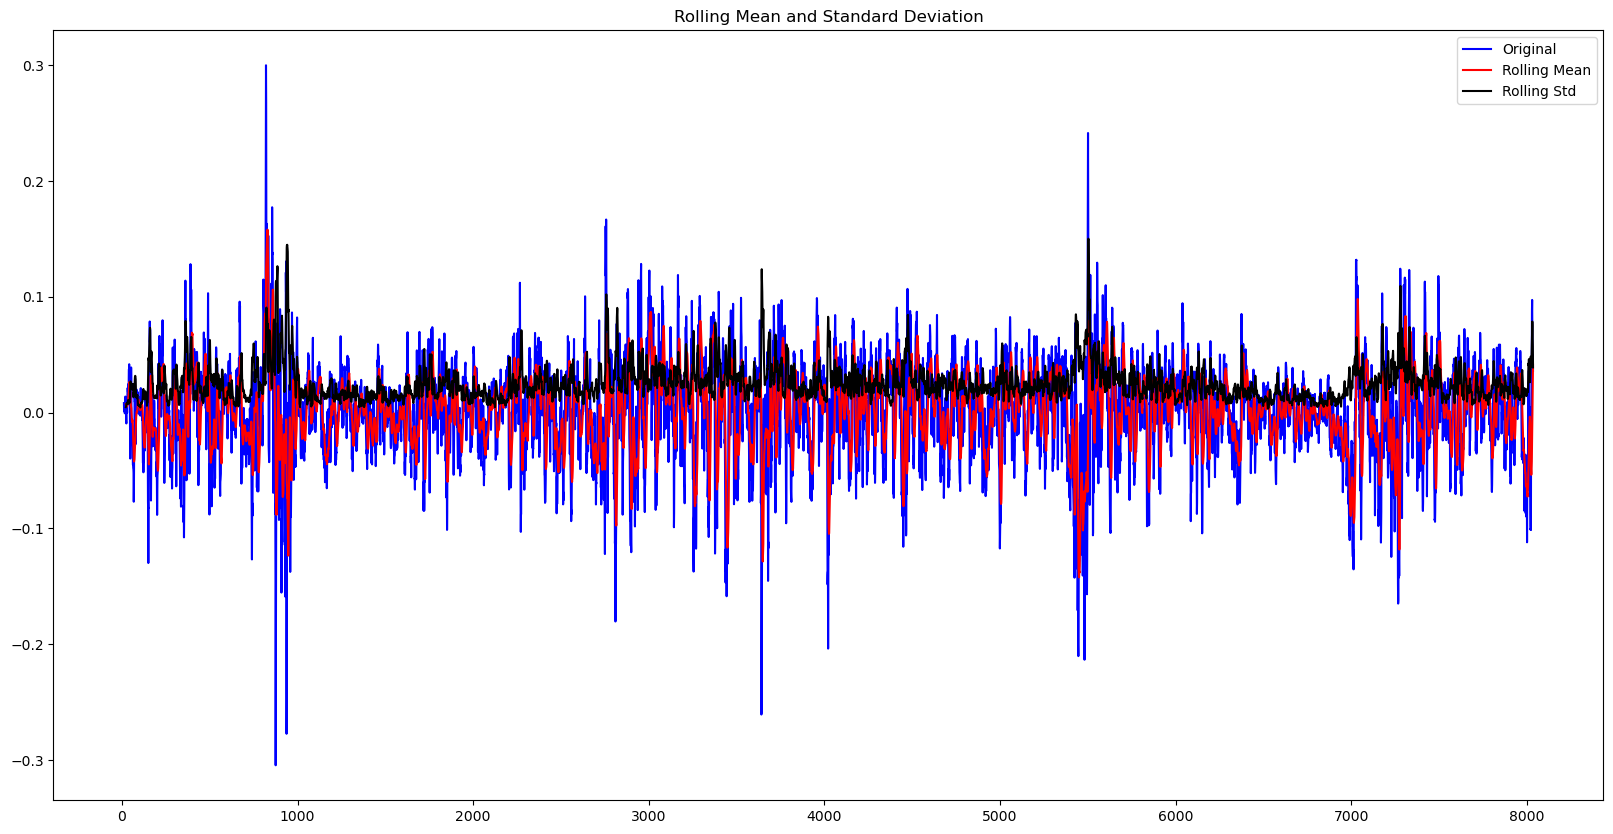

Results of Dickey-Fuller Test:
Test Statistics                  -1.930890
p-value                           0.317672
#Lags Used                       35.000000
Number of Observations Used    8000.000000
Critical Value (1%)              -3.431168
Critical Value (5%)              -2.861901
Critical Value (10%)             -2.566962


In [162]:
test_stationarity(OilPriceLogScaleMinusMovingAverage)

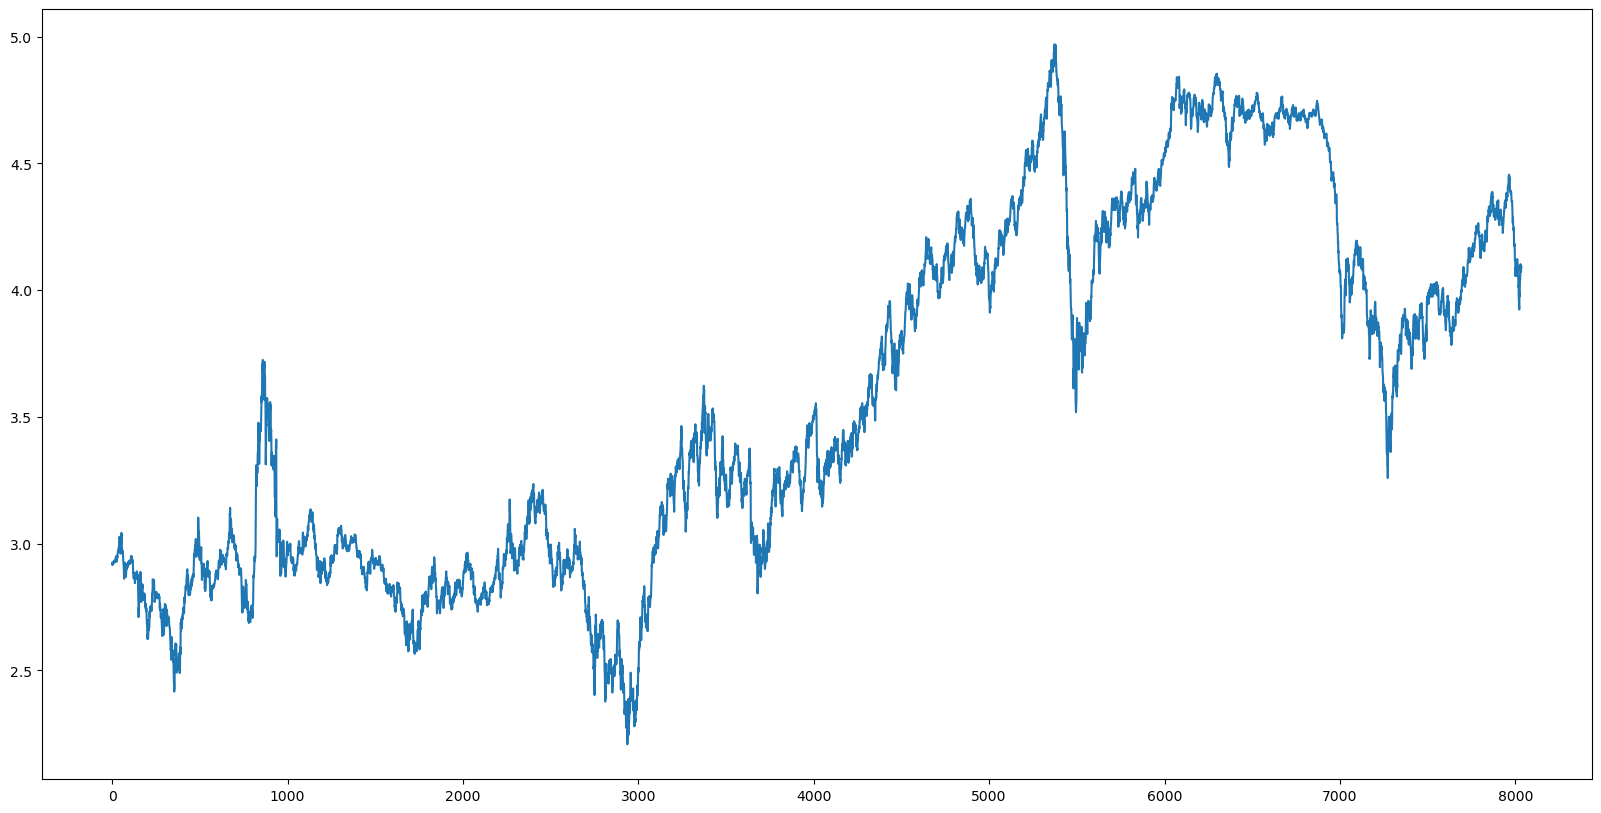

In [163]:
OilPrice_logscale = np.log(OilPrice['Price'])
plt.plot(OilPrice_logscale)

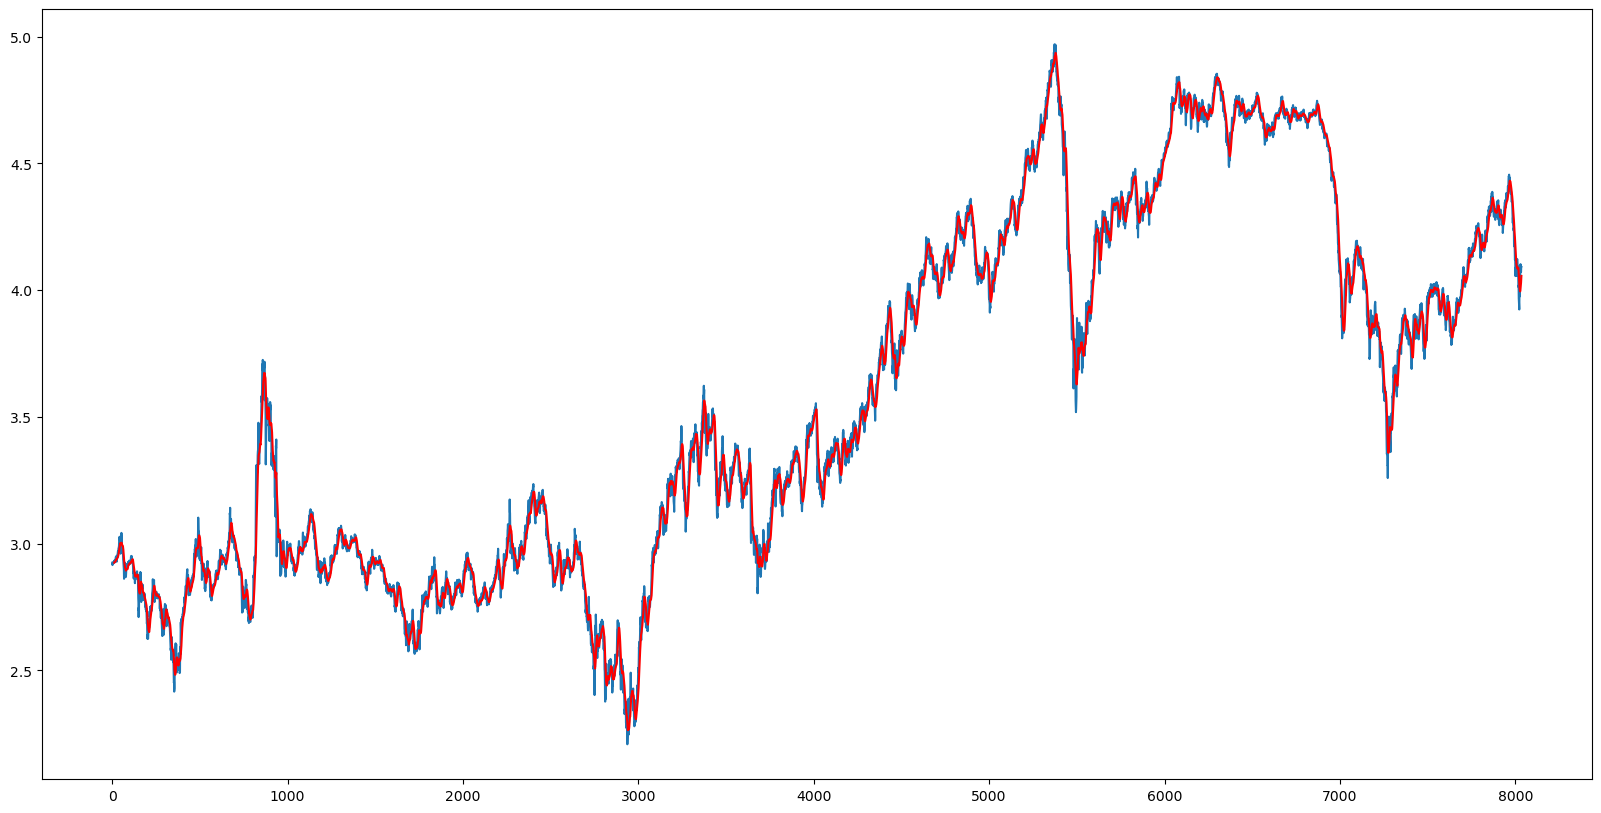

In [164]:
movingAverage= OilPrice_logscale.rolling(window=12).mean()
movingSTD= OilPrice_logscale.rolling(window=12).std()
plt.plot(OilPrice_logscale)
plt.plot(movingAverage, color='red')